#  Diabetes Prediction Using Machine Learning with Python


### Objective:
#### Develop a machine learning model that can predict whether a patient has diabetes or not based on various medical parameters such as blood glucose levels, insulin levels, BMI, and more.


### Key Technologies:
#### Python: Used for data preprocessing, feature selection, model implementation, and deployment.
#### Streamlit: Used for creating a user-friendly web interface for diabetes prediction.
#### Scikit-learn: Used for implementing machine learning algorithms.
#### Pandas: Used for data manipulation and analysis.
#### Matplotlib and Seaborn: Used for data visualization.

### Benefits:
#### Early Detection: The model can help detect diabetes at an early stage, enabling timely interventions and improving patient outcomes.
#### Personalized Medicine: The model can provide personalized predictions based on individual medical parameters, enabling more targeted treatment plans.
#### Cost Savings: The model can reduce healthcare costs by identifying high-risk patients and enabling preventive measures.

### Summary of the dataset:
#### This dataset seems to contain information related to diabetes risk. The variables include :
#### * Pregnancies : The number of pregnencies an individual has had.
#### * Glucose : Glucose levels in the blood.
#### * BloodPressure : Blood pressure readings.
#### * SkinThickness : Thickness of a skinfold at a certain location on the body.
#### * Insulin : Levels of insulin in the blood.
#### * BMI (BODY Mass Index) : A measure of body fat based on height and weight.
#### * DiabetesPredictionFunction: A Function that scores the likelihood of diabetes based on family history.
#### * Age: Age of the individuals
#### * Outcome: abinary variable indicating the presence (1) or absence(0) of a diabetes outcome.

In [2]:
#Importing the required Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Load the Dataset
dia=pd.read_csv("D:\chrome (downloads)\Project 2 MeriSKILL\diabetes.csv")

In [4]:
dia

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


#### dataset outline: This contains 768 observations with 8 feature columns an a target variable 'outcome'

In [4]:
#checking the outline of the dataset 
dia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#checking for null values
dia.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Checking the dupilcate
dia.duplicated().sum

<bound method Series.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool>

In [7]:
dia.duplicated().sum()

0

In [8]:
#Analysing the summary of the dataset
dia.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
dia['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='Outcome'>

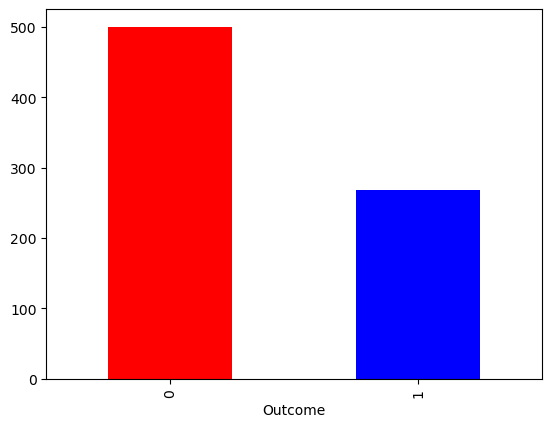

In [10]:
#visualizing bar graph of the outcome 
# 1 means diabetes patient and 0 means no diabetes patient
dia['Outcome'].value_counts().plot(kind='bar', color= ['red','blue'])

<Axes: xlabel='Age', ylabel='Density'>

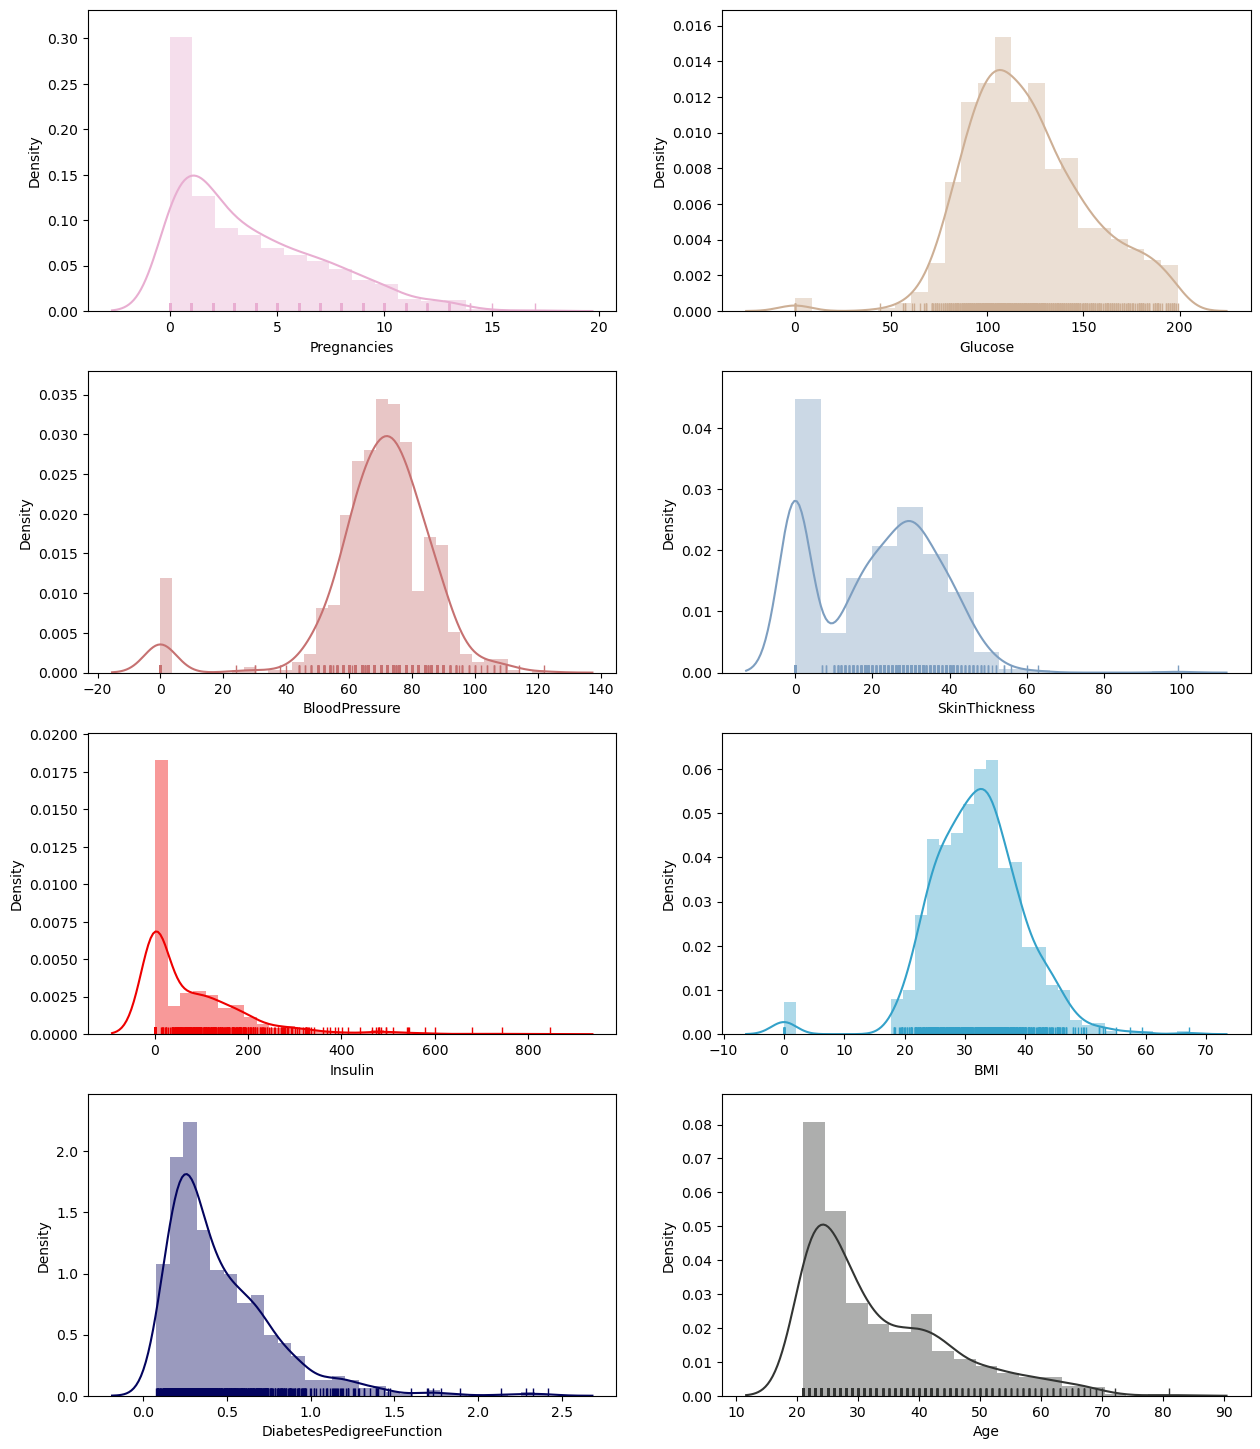

In [25]:
fig, axs = plt.subplots(4, 2, figsize=(15, 18))
axs = axs.flatten()
sns.distplot(dia['Pregnancies'],rug=True, color='#E8AED1', ax=axs[0])
sns.distplot(dia['Glucose'],rug=True, color='#CDAF95', ax=axs[1])
sns.distplot(dia['BloodPressure'],rug=True, color='#C67171', ax=axs[2])
sns.distplot(dia['SkinThickness'],rug=True, color='#7D9EC0', ax=axs[3])
sns.distplot(dia['Insulin'],rug=True, color='#EE0000', ax=axs[4])
sns.distplot(dia['BMI'],rug=True, color='#33A1C9', ax=axs[5])
sns.distplot(dia['DiabetesPedigreeFunction'],rug=True, color='#03045e', ax=axs[6])
sns.distplot(dia['Age'],rug=True, color='#333533', ax=axs[7])

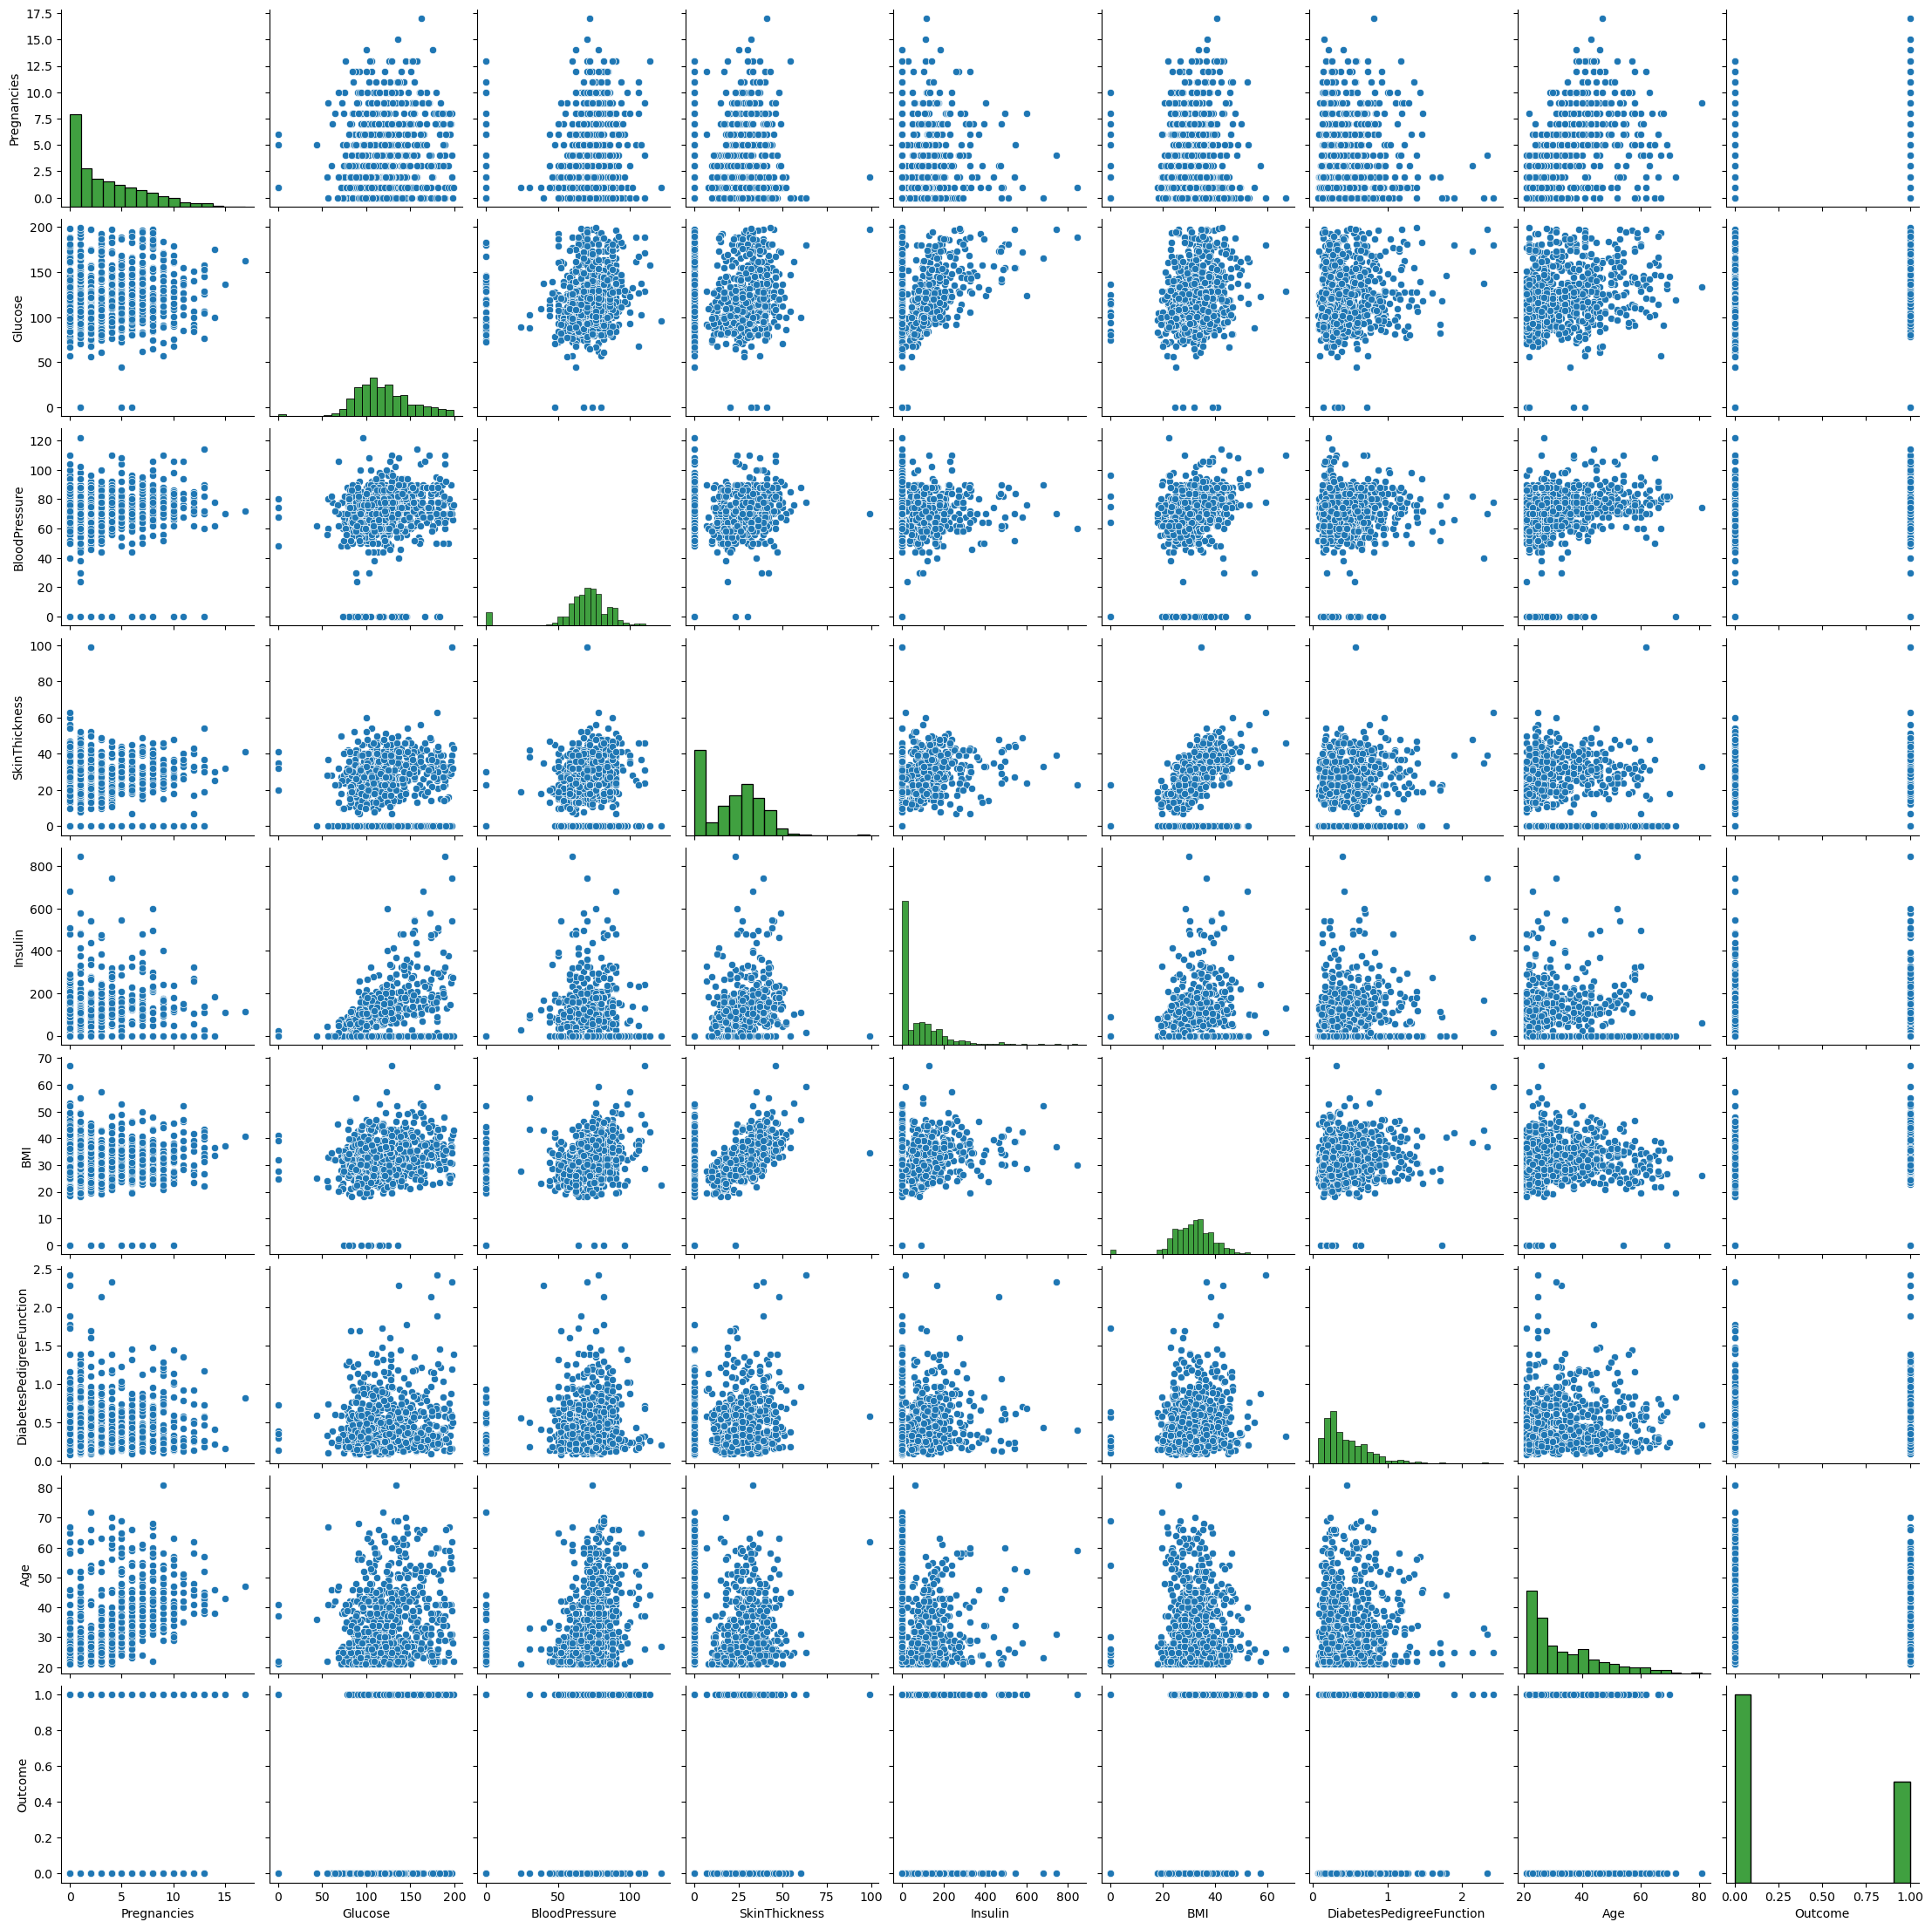

In [28]:
sns.pairplot(dia , diag_kws={'color':'green'})

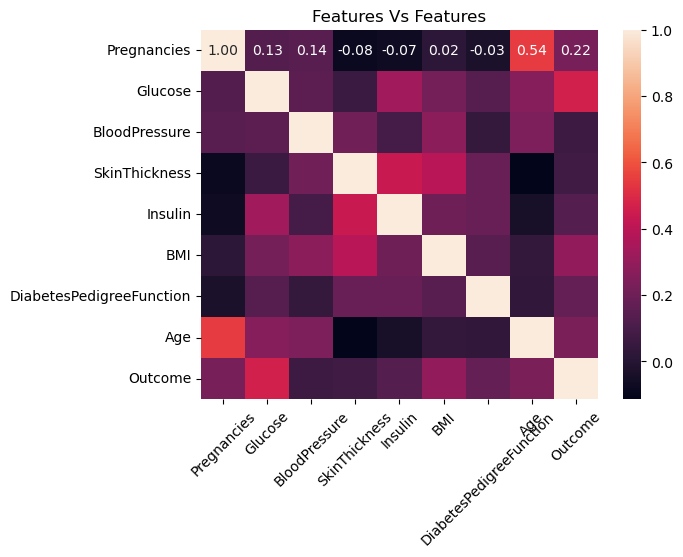

In [31]:
# Visualizing HeatMap 
sns.heatmap(dia.corr(), annot=True ,fmt='.2f')
plt.title('Features Vs Features')
plt.xticks(rotation=45)
plt.show()

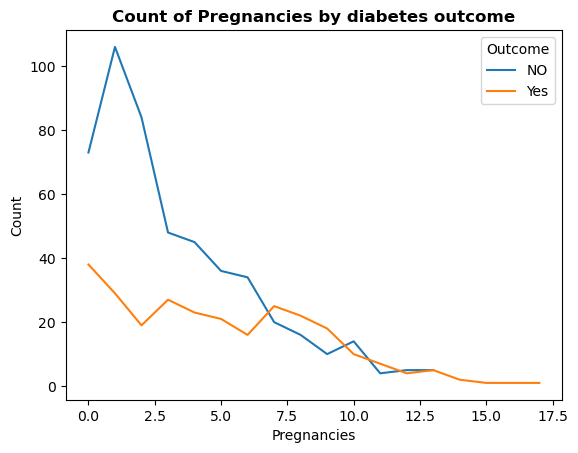

In [40]:
dia.groupby(['Pregnancies','Outcome']).size().unstack(level=1).plot(kind='line')
plt.ylabel('Count')
plt.legend(title='Outcome', labels= ['NO','Yes'])
plt.title('Count of Pregnancies by diabetes outcome', weight='bold')
plt.show()

In [41]:
#Insight:
# The number of having diabetesbis less when the number of pregnancies is low
# The Possibility of having diabetes increses as the number of pregnancies is low  

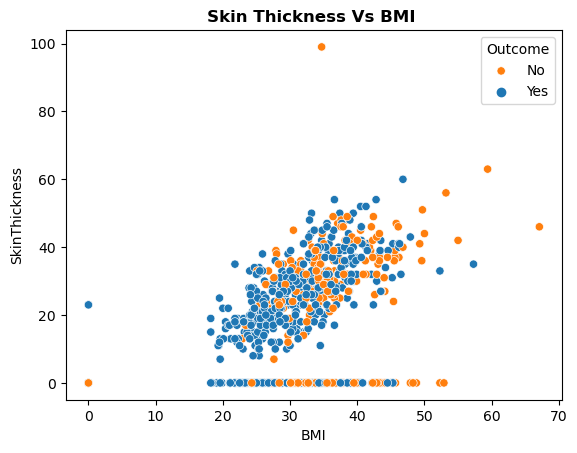

In [43]:
sns.scatterplot(data=dia , x='BMI' , y='SkinThickness' , hue='Outcome')
plt.legend(title= 'Outcome', labels=['No', 'Yes'])
plt.title('Skin Thickness Vs BMI ', weight ='bold')
plt.show()

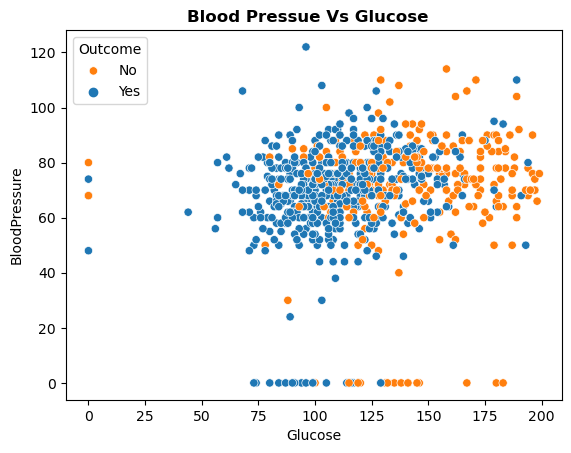

In [48]:
sns.scatterplot(data=dia , x='Glucose' , y='BloodPressure' , hue='Outcome')
plt.legend(title= 'Outcome', labels=['No', 'Yes'])
plt.title('Blood Pressue Vs Glucose  ', weight ='bold')
plt.show()

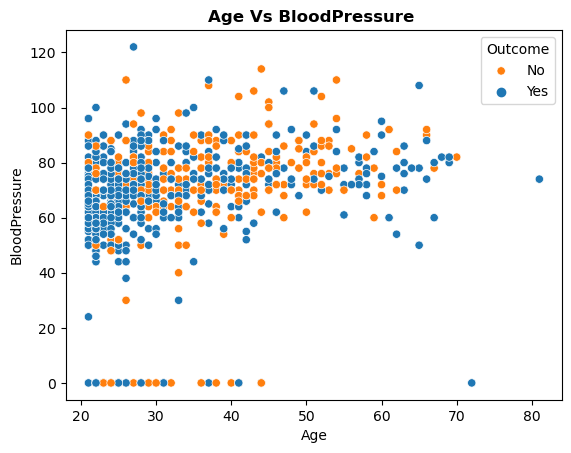

In [49]:
sns.scatterplot(data=dia , x='Age' , y='BloodPressure' , hue='Outcome')
plt.legend(title= 'Outcome', labels=['No', 'Yes'])
plt.title('Age Vs BloodPressure ', weight ='bold')
plt.show()

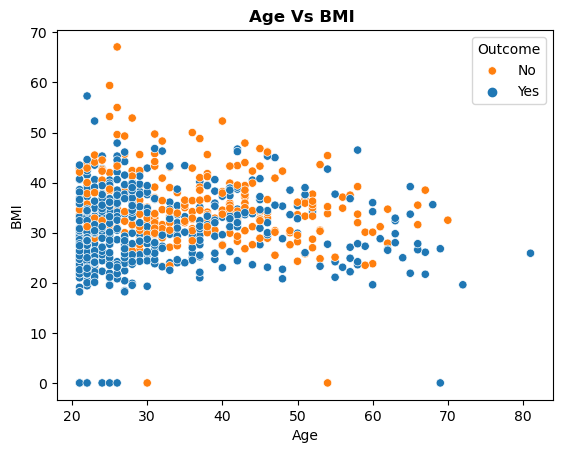

In [50]:
sns.scatterplot(data=dia , x='Age' , y='BMI' , hue='Outcome')
plt.legend(title= 'Outcome', labels=['No', 'Yes'])
plt.title('Age Vs BMI ', weight ='bold')
plt.show()

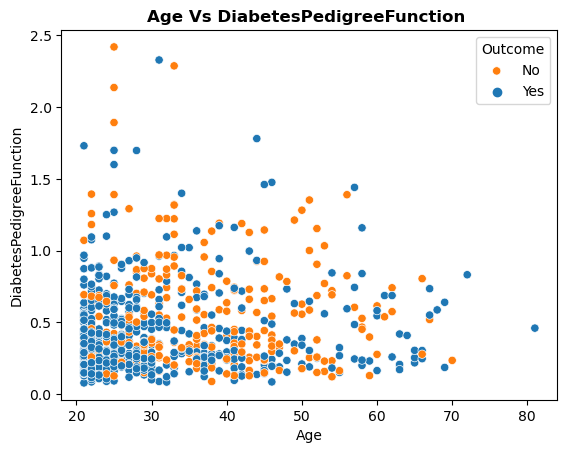

In [51]:
sns.scatterplot(data=dia , x='Age' , y='DiabetesPedigreeFunction' , hue='Outcome')
plt.legend(title= 'Outcome', labels=['No', 'Yes'])
plt.title('Age Vs DiabetesPedigreeFunction ', weight ='bold')
plt.show()

In [5]:
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [6]:
#splitting data into features and target
x= dia.drop(["Outcome"], axis= "columns") 
y= dia["Outcome"]

x.head()

In [7]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [8]:
#splitting the dataset into training and test set
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size= 0.2, train_size= 0.8,random_state=123,shuffle= True)

In [9]:
x_test.shape,x_train.shape, y_test.shape, y_train.shape

((614, 8), (154, 8), (614,), (154,))

# Model building 

### Logistic Regression 

In [10]:
#import Logistic regression from sklearn module
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [19]:
LR=LogisticRegression()

In [21]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train,y_train)

LogisticRegression()

In [25]:
LR.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred= LR.predict(x_test)

In [27]:
accuracy= accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.754071661237785


In [28]:
CM = confusion_matrix(y_test, y_pred)
print(CM)

[[344  60]
 [ 91 119]]


In [29]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       404
           1       0.66      0.57      0.61       210

    accuracy                           0.75       614
   macro avg       0.73      0.71      0.72       614
weighted avg       0.75      0.75      0.75       614



# Decision Tree 

In [32]:
from sklearn.tree import DecisionTreeClassifier 

In [33]:
DT= DecisionTreeClassifier()

In [34]:
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
y.pred = DT.predict(x_test)

In [37]:
DT.score(x_test, y_test)

0.6775244299674267

In [38]:
accuracy_DT = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_DT)

Accuracy: 0.754071661237785


In [39]:
CM_DT = confusion_matrix(y_test, y_pred)
print(CM_DT)

[[344  60]
 [ 91 119]]


In [40]:
class_report= classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       404
           1       0.66      0.57      0.61       210

    accuracy                           0.75       614
   macro avg       0.73      0.71      0.72       614
weighted avg       0.75      0.75      0.75       614



# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier 

In [42]:
random_forest = RandomForestClassifier(n_estimators=10)

In [43]:
random_forest.fit(x_train, y_train) 

RandomForestClassifier(n_estimators=10)

In [44]:
y_pred = random_forest.predict(x_test)

In [45]:
random_forest.score(x_test, y_test)

0.744299674267101

In [46]:
accuracy_RF = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RF)

Accuracy: 0.744299674267101


In [48]:
CM_RF = confusion_matrix(y_test, y_pred)
print(CM_RF)

[[344  60]
 [ 97 113]]


In [49]:
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.78      0.85      0.81       404
           1       0.65      0.54      0.59       210

    accuracy                           0.74       614
   macro avg       0.72      0.69      0.70       614
weighted avg       0.74      0.74      0.74       614



# Gaussian Naive Bayes Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [15]:
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [16]:
y_pred_NB = naive_bayes.predict(x_test)

In [54]:
naive_bayes.score(x_test, y_test)

0.741042345276873

In [17]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
print("Accuracy:", accuracy_NB)

Accuracy: 0.741042345276873


In [18]:
CM_NB = confusion_matrix(y_test, y_pred_NB)
print(CM_NB)

[[329  75]
 [ 84 126]]


In [19]:
class_report = classification_report(y_test, y_pred_NB)
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       404
           1       0.63      0.60      0.61       210

    accuracy                           0.74       614
   macro avg       0.71      0.71      0.71       614
weighted avg       0.74      0.74      0.74       614



# Interpretation and summary report


* Imported the necessary modules for the project and checked the data 
* Performed Exploratory analysis to visualize the distribution of different features
* Preformed preprocessing steps to treat the missing values
* Used 4 Models (Logistic Regression , random Forest , Decision tree  and Naive Bayes Classifier) to find the best model for prediction
* Evaluated the performance using the Accuracy, Pression, Recall, and F1 score
* Based on the performance evaluation, Logistic Regression performed well in predicting if someone has diabetes or not
* Logistic regression has the highest accuracy of 76%
* This model also exhibited reasonable precision and recall, indicating its ability to correctly classify both positive and negative cases of diabetes.
* So, The Machine learning approach , specifically the Logistic regression , can be a valuable tool for predicting diabetes outcomes based on health-related variables
  